In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import numpy.random as npr 
import pandas_datareader as pdr 
import math

In [4]:
End = dt.datetime.now()
Start = dt.datetime(2017,1,1)
BN = pdr.get_data_yahoo('^NSEBANK', Start, End) 
Close_price = BN.Close
Close_price.head()

Date
2017-01-03    18035.599609
2017-01-04    17891.000000
2017-01-05    18115.949219
2017-01-06    18264.000000
2017-01-09    18286.650391
Name: Close, dtype: float64

In [6]:
Returns = np.log(BN.Close/BN.Close.shift(1)).dropna() 
Returns.head()

Date
2017-01-04   -0.008050
2017-01-05    0.012495
2017-01-06    0.008139
2017-01-09    0.001239
2017-01-10    0.006701
Name: Close, dtype: float64

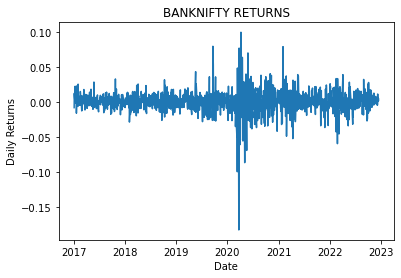

In [7]:
plt.plot(Returns) 
plt.ylabel('Daily Returns') 
plt.xlabel('Date') 
plt.title('BANKNIFTY RETURNS') 
plt.show()

<AxesSubplot:xlabel='Date'>

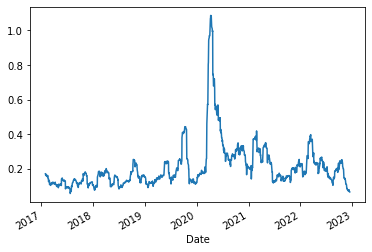

In [8]:
##Volatility Calculation
TRADING_DAYS = 20
volatility = Returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)

volatility.plot()

In [21]:
#Blackscholes Merton Model
S0 = 43921
R = 0.06
Sm = 0.15 #sigma 
T=1
I = 20000
K = 44000

In [22]:
def gbm_mcs_stat(K):
    I = 10000
M = 100
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((R - 0.5 * Sm ** 2) * dt +
Sm * math.sqrt(dt) * npr.standard_normal(I))
    hT = np.maximum(S[t] - K, 0)
    C0 = math.exp(-R * T) * np.mean(hT)
    print (C0)
    gbm_mcs_stat(K=44000)

226.1088801288187
343.3982994255266
435.0620039408342
513.9928415820029
586.2076175887893
656.2595139859379
719.0830467282655
783.0908366992369
844.5091727443989
894.280192840039
948.3903174684249
1000.6942887866832
1047.5111178629772
1095.7791489704869
1138.6270379033276
1184.8886771842954
1230.713098279408
1271.858288557722
1310.2995477945594
1348.1571030702016
1393.278703949896
1429.1716122031703
1469.5804285816946
1508.3333165446595
1546.913594646868
1585.3074132543538
1620.2939796201044
1656.2950959364669
1694.2561965255427
1733.7766348739879
1768.691492220865
1800.914430152079
1836.1503220229188
1869.475383268836
1905.9023304110522
1942.4572311611814
1981.9221360953713
2020.751631995141
2055.234229190051
2088.041633414318
2125.350707074568
2163.604411377037
2188.943584633251
2217.775636303263
2254.4841650834314
2293.7790539470197
2324.2651342995387
2353.256302700812
2385.6933387882814
2422.7561054487837
2453.822646086794
2480.2127988157426
2517.7456013161855
2550.1789058083646
25

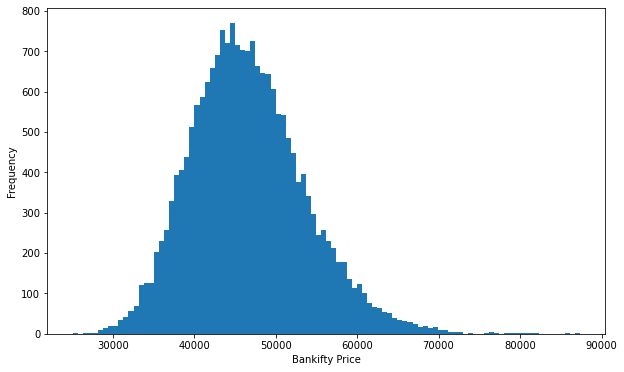

In [23]:
plt.figure(figsize=(10, 6)) 
plt.hist(S[-1], bins=100)
plt.xlabel('Bankifty Price')
plt.ylabel('Frequency');